In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

In [2]:
youtube = pd.read_csv("youtube.csv")

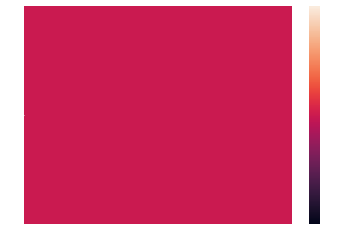

In [3]:
sns.heatmap(youtube.corr())

In [4]:
youtube

Rank Grade                Channel name Video Uploads Subscribers  \
0         1st  A++                       Zee TV         82757    18752951   
1         2nd  A++                     T-Series         12661    61196302   
2         3rd  A++   Cocomelon - Nursery Rhymes           373    19238251   
3         4th  A++                    SET India         27323    31180559   
4         5th  A++                          WWE         36756    32852346   
...       ...   ...                         ...           ...         ...   
4995  4,996th   B+               Uras Benlioğlu           706     2072942   
4996  4,997th   B+            HI-TECH MUSIC LTD           797     1055091   
4997  4,998th   B+                  Mastersaint           110     3265735   
4998  4,999th   B+               Bruce McIntosh          3475       32990   
4999  5,000th   B+                    SehatAQUA           254       21172   

      Video views  
0     20869786591  
1     47548839843  
2      9793305082  
3     22675948293  
4     26273668433  
...           ...  
4995    441202795  
4996    377331722  
4997    311758426  
4998     14563764  
4999     73312511  

[5000 rows x 6 columns]

In [5]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [6]:
youtube['Subscribers'] = youtube['Subscribers'].str.strip().str.replace('-', '0').astype('int')

In [7]:
youtube['Video views'] = youtube['Video views'].replace('-', '0').astype('int')

In [8]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null int64
Video views      5000 non-null int64
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [9]:
youtube.drop(axis=1, labels=['Rank', 'Grade', 'Channel name', 'Video Uploads'], inplace=True)

In [10]:
youtube.head()

Subscribers  Video views
0     18752951  20869786591
1     61196302  47548839843
2     19238251   9793305082
3     31180559  22675948293
4     32852346  26273668433

Text(0.5, 1.0, 'Youtube Subscribers vs Views')

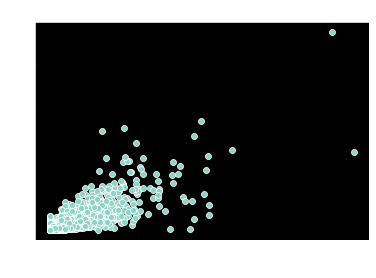

In [11]:
sns.scatterplot(x='Subscribers', y='Video views', data=youtube)
plt.xlabel("Youtube Subscribers")
plt.ylabel("Youtube Views")
plt.title("Youtube Subscribers vs Views")

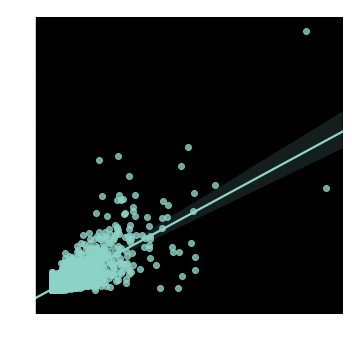

In [12]:
sns.lmplot(x='Subscribers', y='Video views', data=youtube)

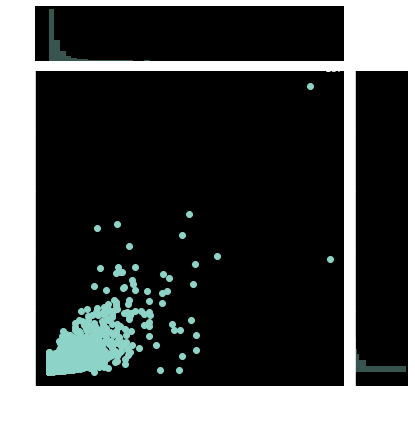

In [13]:
sns.jointplot(x='Subscribers', y='Video views', data=youtube)

In [14]:
X = youtube[['Subscribers']]

In [15]:
X

Subscribers
0        18752951
1        61196302
2        19238251
3        31180559
4        32852346
...           ...
4995      2072942
4996      1055091
4997      3265735
4998        32990
4999        21172

[5000 rows x 1 columns]

In [16]:
y = youtube['Video views']

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [22]:
X_train

Subscribers
4569       511032
1905      2591577
3080       151818
1205      2856775
2181            0
...           ...
1180      6172108
3441       497507
1344      2958244
4623            0
1289     30796414

[3333 rows x 1 columns]

In [23]:
y_train

4569     219675437
1905     576638379
3080     370212210
1205    3937497827
2181     562403527
           ...    
1180    1609292736
3441     135027409
1344     476370140
4623      91974820
1289    6870520811
Name: Video views, Length: 3333, dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = lr.predict(X_test)

In [27]:
y_pred

array([4.25650766e+09, 7.88073961e+08, 1.30564109e+08, ...,
       7.76551819e+08, 1.37957037e+08, 3.96906229e+08])

In [28]:
lr.score(X_test, y_test)

0.7005549667918163

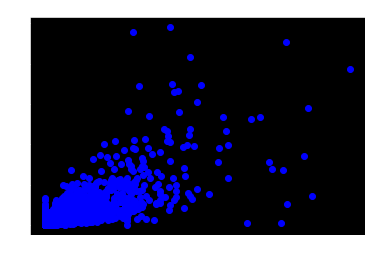

In [31]:
plt.scatter(X_train, y_train, color='blue')

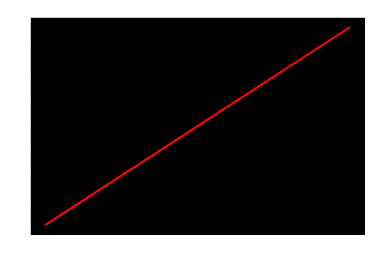

In [32]:
plt.plot(X_train, lr.predict(X_train), color='red')

In [33]:
from sklearn import metrics

In [35]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE:  568746134.1726938
MSE:  1.508750091688814e+18
RMSE:  23848.39898552299


In [40]:
subs = int(input("Please enter the number of subscribers: "))
array = np.array(subs)
ival = array.astype(np.int)
ival_2D = ([[ival]])
# print(ival_2D)
prediction = lr.predict(ival_2D)
views = np.array(prediction)
views = views.item()
print(f"The estimated views for subscribers {subs} is: {views}")

Please enter the number of subscribers: 500
The estimated views for subscribers 500 is: 118939108.52566417
